In [21]:
%matplotlib inline


# Classifier comparison


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.



Automatically created module for IPython interactive environment


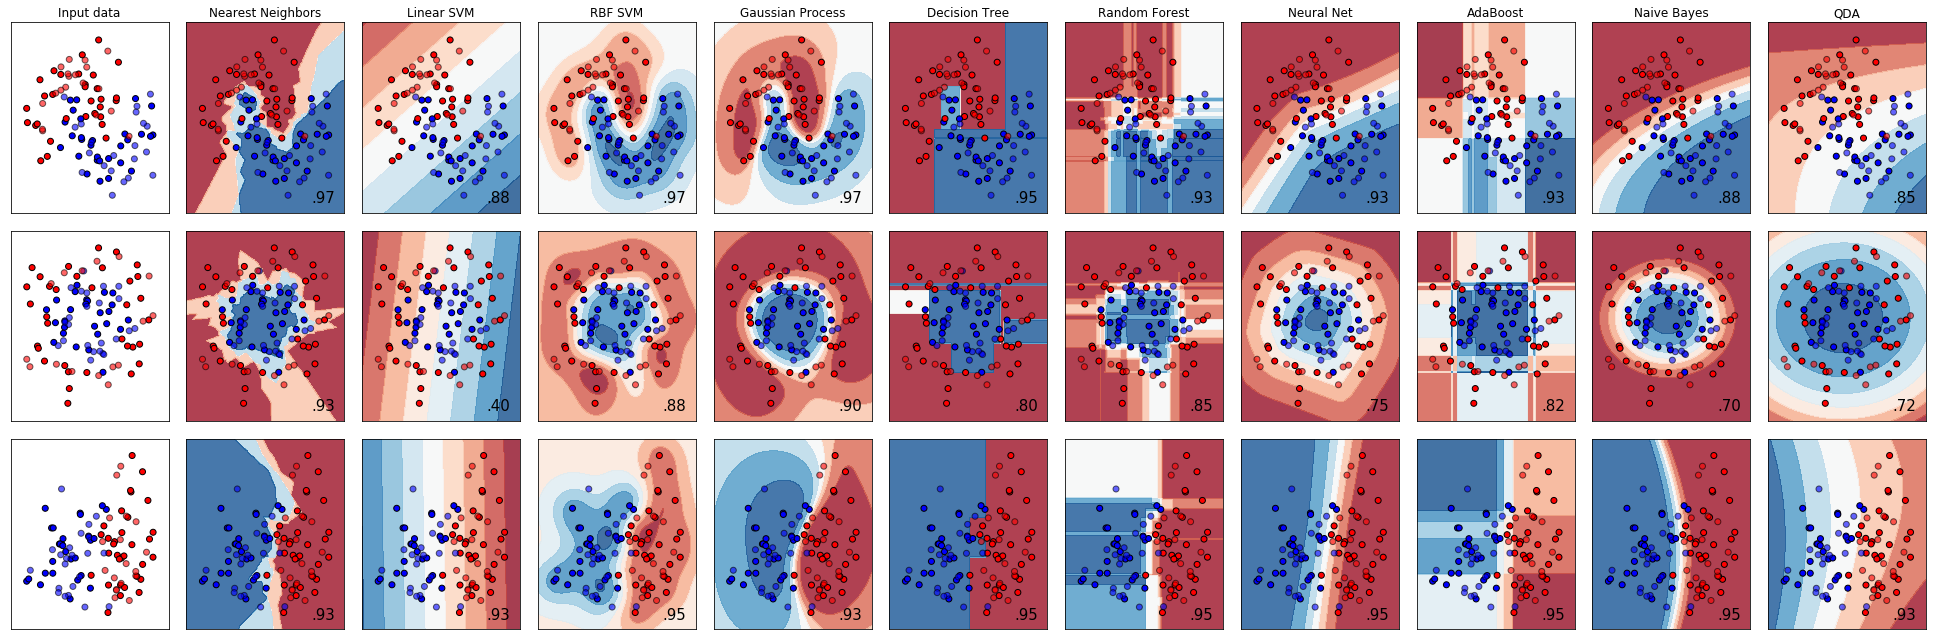

In [65]:
print(__doc__)

# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import custom_image_toolkit as g
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

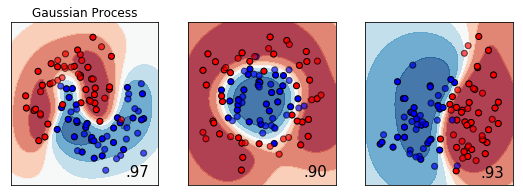

In [66]:
h = .02  # step size in the mesh

name = "Gaussian Process"
clf = GaussianProcessClassifier(1.0 * RBF(1.0))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(9, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1,len(datasets), i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    i+=1

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
#     if hasattr(clf, "decision_function"):
#     Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
#     i += 1

# plt.tight_layout()
# plt.show()

Now we try our hand at using this method to assign class based on properties of the cell

In [67]:
path = '/scratch/lab/image_analysis_scratch/181207_yFB79_60X_Raff_125uMGal_ML_test/timelapse/whi5_analysis'
X=np.load(path+'/training_cells.npy')
y = np.load(path+'/training_cells_labels.npy')

207 401 38
(1117, 3) (1118, 3)
0.9821109123434705
[-8.00545961 -7.94077476 -7.87608992 ...  5.57203136  5.63671621
  5.70140105]
(401, 207) (401, 207) (401, 207)
[0, 1] 2
[-7.78124731 -7.71656247 -7.65187762 ...  5.42152417  5.48620902
  5.55089386]
(38, 207) (38, 207) (38, 207)
[0, 2] 1
[-13.9788399  -13.91415505 -13.84947021 ...  11.77279164  11.83747649
  11.90216133]
(38, 401) (38, 401) (38, 401)
[1, 2] 0


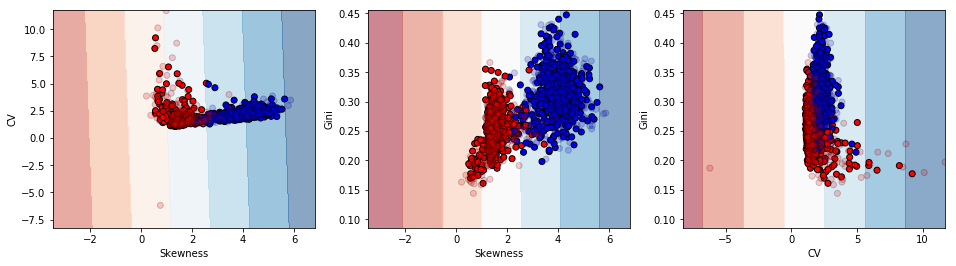

In [178]:
# name = "Gaussian Process"
# clf = GaussianProcessClassifier(1.0 * RBF(1.0))
name = 'Linear SVM'
clf = SVC(kernel="linear", C=0.025)
fig=plt.figure(figsize=[16,4])
# X=np.array(vals)
h, h1=0.05, 0.01
x_min, x_max = np.median(X[:, 0]) - 4*np.std(X[:,0]), np.median(X[:, 0]) + 4*np.std(X[:,0])
y_min, y_max = np.median(X[:, 1]) - 4*np.std(X[:,1]), np.median(X[:, 1]) + 4*np.std(X[:,1])
z_min, z_max = np.median(X[:, 2]) - 4*np.std(X[:,2]), np.median(X[:, 2]) + 4*np.std(X[:,2])
xr, yr, zr = np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), np.arange(z_min, z_max, h1)
vr = [xr, yr, zr]
print len(xr), len(yr), len(zr)
xx, yy, zz = np.meshgrid(xr, yr, zr)
vv=[xx,yy,zz]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)
print X_train.shape, X_test.shape
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print score
pairs = [[0,1], [0,2], [1,2]]
absent = [2,1,0]
labels = ['Skewness', 'CV', 'Gini']
for i0 in range(0,3):
    ax = plt.subplot(1,3, i0+1)
    xx, yy = np.meshgrid(vr[pairs[i0][0]], vr[pairs[i0][1]])
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(),np.mean(vr[absent[i0]])*np.ones(len(xx.ravel()))])
        print Z
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel(),np.mean(vr[absent[i0]])*np.ones(len(xx.ravel()))])[:, 1]
    # Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    print xx.shape, yy.shape, Z.shape
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.5)
#     ax.set_title("Input data")
    # Plot the training points

    ax.scatter(X_train[:, pairs[i0][0]], X_train[:, pairs[i0][1]], c=y_train, cmap=cm_bright,
           edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, pairs[i0][0]], X_test[:, pairs[i0][1]], c=y_test[:], cmap=cm_bright,
           edgecolors='k', alpha=0.2)

    ax.set_xlim(vv[pairs[i0][0]].min(), vv[pairs[i0][0]].max())
    ax.set_ylim(vv[pairs[i0][1]].min(), vv[pairs[i0][1]].max())

    # Put the result into a color plot
#     if i0 ==1:
    # Plot the training points

    ax.set_xlim(vv[pairs[i0][0]].min(), vv[pairs[i0][0]].max())
    ax.set_ylim(vv[pairs[i0][1]].min(), vv[pairs[i0][1]].max())
    ax.set_xlabel(labels[pairs[i0][0]])
    ax.set_ylabel(labels[pairs[i0][1]])
    print pairs[i0], absent[i0]
#     x1, y1 = np.meshgrid(vr[pairs[i0][0]], vr[pairs[i0][1]])
#     z1 = np.amax(Z,axis=absent[i0])
#     print x1.shape, y1.shape, z1.shape
#     print np.amax(x1), np.amin(x1), np.amax(y1), np.amin(y1)
#     print i0, x1.shape, y1.shape, z1.shape, np.amin(z1), np.amax(z1)
#     if  i0 ==0:
#         ax.contourf(x1, y1, z1, cmap=cm, alpha=.5)
#     else:
#         ax.contourf(x1, y1, np.transpose(z1), cmap=cm, alpha=.5)
#     plt.imshow(z1)
#     ax.contourf(np.mean(vv[pairs[i0][0]],axis=absent[i0]), np.mean(vv[pairs[i0][1]],axis=absent[i0]),\
# np.amax(Z,axis=absent[i0], cmap=cm, alpha=.5)
# ax.set_xticks(())
# ax.set_yticks(())
# plt.show()
plt.savefig('/home/felix/Dropbox/meetings/190329_Secondary_field/classifier_performance.png', bbox_inches='tight')

In [162]:
Z.shape

(401, 207, 38)

In [160]:
i0=1
print pairs[i0]
xx[:,:,1]

[0, 2]


array([[-3.47167584, -3.42167584, -3.37167584, ...,  6.72832416,
         6.77832416,  6.82832416],
       [-3.47167584, -3.42167584, -3.37167584, ...,  6.72832416,
         6.77832416,  6.82832416],
       [-3.47167584, -3.42167584, -3.37167584, ...,  6.72832416,
         6.77832416,  6.82832416],
       ...,
       [-3.47167584, -3.42167584, -3.37167584, ...,  6.72832416,
         6.77832416,  6.82832416],
       [-3.47167584, -3.42167584, -3.37167584, ...,  6.72832416,
         6.77832416,  6.82832416],
       [-3.47167584, -3.42167584, -3.37167584, ...,  6.72832416,
         6.77832416,  6.82832416]])

In [142]:
xx

array([[[-3.47167584, -3.47167584, -3.47167584, ..., -3.47167584,
         -3.47167584, -3.47167584],
        [-3.42167584, -3.42167584, -3.42167584, ..., -3.42167584,
         -3.42167584, -3.42167584],
        [-3.37167584, -3.37167584, -3.37167584, ..., -3.37167584,
         -3.37167584, -3.37167584],
        ...,
        [ 6.72832416,  6.72832416,  6.72832416, ...,  6.72832416,
          6.72832416,  6.72832416],
        [ 6.77832416,  6.77832416,  6.77832416, ...,  6.77832416,
          6.77832416,  6.77832416],
        [ 6.82832416,  6.82832416,  6.82832416, ...,  6.82832416,
          6.82832416,  6.82832416]],

       [[-3.47167584, -3.47167584, -3.47167584, ..., -3.47167584,
         -3.47167584, -3.47167584],
        [-3.42167584, -3.42167584, -3.42167584, ..., -3.42167584,
         -3.42167584, -3.42167584],
        [-3.37167584, -3.37167584, -3.37167584, ..., -3.37167584,
         -3.37167584, -3.37167584],
        ...,
        [ 6.72832416,  6.72832416,  6.72832416, ...,  

In [ ]:
plt

In [69]:
temp1=np.load('./access_files/fl_loc_cells.npy')
temp2=np.load('./access_files/samples.npy')
temp3=np.load('./access_files/completed_samples.npy')
temp4 = np.load('./access_files/scene_1_frame_6.npy')
print temp2, temp3
# scene = np.searchsorted(indexing, temp_ind, side='right')
# frame_num = temp_ind - indexing[scene-1] + 1

[464 747 447 295 777   8 481 426 251 684 247 291 585 380 671 171 140 211
 316 733 660 787 429 406 215  18 322 551   5 714] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [72]:
def summary_statistics(test_out, test_y):
    num_fp = np.sum((test_out-test_y)>0)
    num_tp = np.sum((test_out*test_y)>0)
    num_tn = np.sum((test_out-1)*(test_y-1)>0)
    num_fn = np.sum((test_out-test_y)<0)
    acc = (num_tp+num_tn)*1.0/(num_fp+num_tp+num_tn+num_fn)
    sens = num_tp*1.0/(num_tp+num_fn)
    spec = num_tn*1.0/(num_tn+num_fp)
    print 'FP', 'TP', 'TN', 'FN'
    print num_fp, num_tp, num_tn, num_fn
    return acc, sens, spec

def statistics_comparison(test_out1, test_out2, test_y):
    vals1 = summary_statistics(test_out1, test_y)
    vals2 = summary_statistics(test_out2, test_y)
    fig=plt.figure(figsize=[7,7])
    df = pd.DataFrame({'class':['Gaussian Process', 'Skewness Cutoff'], 'Accuracy':[vals1[0], vals2[0]]
                       , 'Sensitivity':[vals1[1],vals2[1]], 'Specificity':[vals1[2], vals2[2]]})
#     print df
    return df

In [45]:
y_test_pred = clf.predict(X_test)
out = summary_statistics(y_test_pred, y_test)
print 'Accuracy, Sensitivity, Specificity'
print np.around(out,4)

FP TP TN FN
13 457 641 7
Accuracy, Sensitivity, Specificity
[0.9821 0.9849 0.9801]


In [46]:
a=[1,2,3]
b=a
a=[2,5,7]
print a, b

[2, 5, 7] [1, 2, 3]


In [47]:
from shutil import copyfile

In [48]:
copyfile('./access_files/cell_coords_scene_1_frame_12.txt', './cell_coords_scene_1_frame_12.txt')

In [49]:
X_test

array([[4.24632566, 2.11315046, 0.34774621],
       [3.77981945, 2.17094754, 0.40419623],
       [1.52715571, 1.32833039, 0.26190549],
       ...,
       [4.05973209, 2.32828518, 0.28861833],
       [1.29912403, 1.1836914 , 0.28398985],
       [2.10873146, 1.99284113, 0.31701428]])

Skew cutoff 2.0303030303030303
FP TP TN FN
28 464 626 0
Accuracy, Sensitivity, Specificity
[0.975  1.     0.9572]


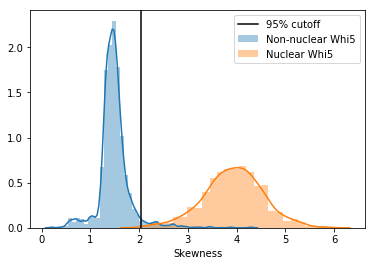

In [100]:
lower_bound=0.95
v2 = X[np.nonzero(X[:,0]*y),0]
v1 = X[np.nonzero(X[:,0]*(y-1)),0]
sns.distplot(v1, label='Non-nuclear Whi5')
sns.distplot(v2, label='Nuclear Whi5')
plt.xlabel('Skewness')
kde = scipy.stats.gaussian_kde(v1)
kde1 = scipy.stats.gaussian_kde(v2)
xpoints = np.linspace(-2.0, 5.0, 100)
vals = [kde.integrate_box_1d(low=-10, high=lim) for lim in xpoints]
sel = [i for i, e in enumerate(vals) if e > lower_bound]
skew_cutoff = xpoints[sel[0]]
plt.axvline(skew_cutoff,c='k', label='95% cutoff')
plt.legend()
# plt.show()
print 'Skew cutoff', skew_cutoff
y_test_pred1 = X_test[:,0]>skew_cutoff
out1 = summary_statistics(y_test_pred1, y_test)
print 'Accuracy, Sensitivity, Specificity'
print np.around(out1,4)
plt.savefig('/home/felix/Dropbox/meetings/190329_Secondary_field/skewness_thresholding.png', bbox_inches='tight')

FP TP TN FN
13 457 641 7
FP TP TN FN
28 464 626 0


<Figure size 504x504 with 0 Axes>

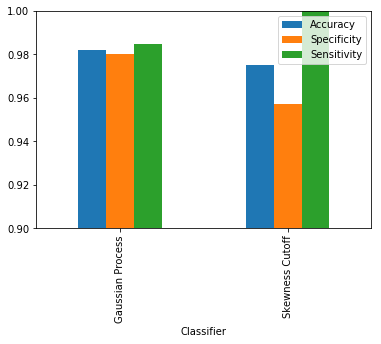

In [97]:
# fig=plt.figure(figsize=[6,6])
comp= statistics_comparison(y_test_pred, y_test_pred1, y_test)
# ax=plt.subplot(1,1,1)
ax=comp.plot(x='Classifier', y=['Accuracy', 'Specificity', 'Sensitivity'],kind='bar')
plt.ylim(ymin=0.9, ymax=1.0)
# plt.show()
plt.savefig('/home/felix/Dropbox/meetings/190329_Secondary_field/classifier_comparison.png', bbox_inches='tight')

In [7]:
x=[1]
print int(np.sum(x[:0]))

0


In [8]:
y=range(9)
np.searchsorted(y,1.0, side='right')

2

In [9]:
def write_list_to_file(guest_list, filename):
    """Write the list to csv file."""

    with open(filename, "w") as outfile:
        for entries in guest_list:
            outfile.write(entries)
            outfile.write("\n")

In [10]:
a=np.zeros(10)
np.nonzero(a==0)[0][0]

0

In [11]:
for ind in a[10:]:
    print ind

In [12]:
x=np.ones([1,3])
y=np.zeros([5,3])
z=np.concatenate((x,y),axis=0)
print z

[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
